In [1]:
%run '/home/gvolta/Desktop/Function/Useful/Def.ipynb'

Initialization done, Notebook was last run on: 22/07/2019


In [2]:
from pax import units, configuration
pax_config = configuration.load_configuration('XENON1T')['DEFAULT']
tpc_height = pax_config['tpc_length']
tpc_radius = pax_config['tpc_radius']

import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         main_data_paths= ['/dali/lgrandi/xenon1t/processed/pax_v6.10.1'], 
         minitree_paths = ['/dali/lgrandi/giovo/minitrees/pax_v6.10.1',
                           '/dali/lgrandi/xenon1t/minitrees/pax_v6.10.1'],
         make_minitrees = False)

%matplotlib inline

In [3]:
dali_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/'
project_path = '/project/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/'
bg_path = '/project/lgrandi/ccapelli/haxcache/final_SR1/'

In [4]:
file = project_path + 'BG_SR1_S1PL.pkl'
data = pd.read_pickle(file)
data = data[data['s1']<2e4]

- cut on z

In [5]:
def exp(x, p0, p1, p3):
    return p0 + p1 *np.exp(-p3*x)
 
popt_z= [4.48526353e+02, 4.70652805e-04, 1.60511915e-01]

data['CutS1PF_z'] = (data['s1_pattern_fit_hax'] < exp(data['z_3d_nn_tf'], *popt_z))
data_AF_z = hax.cuts.selection(data, data['CutS1PF_z'] == True)
data_cut_z = hax.cuts.selection(data, data['CutS1PF_z'] == False)

Unnamed selection: 26225 rows removed (94.07% passed)
Unnamed selection: 415814 rows removed (5.93% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


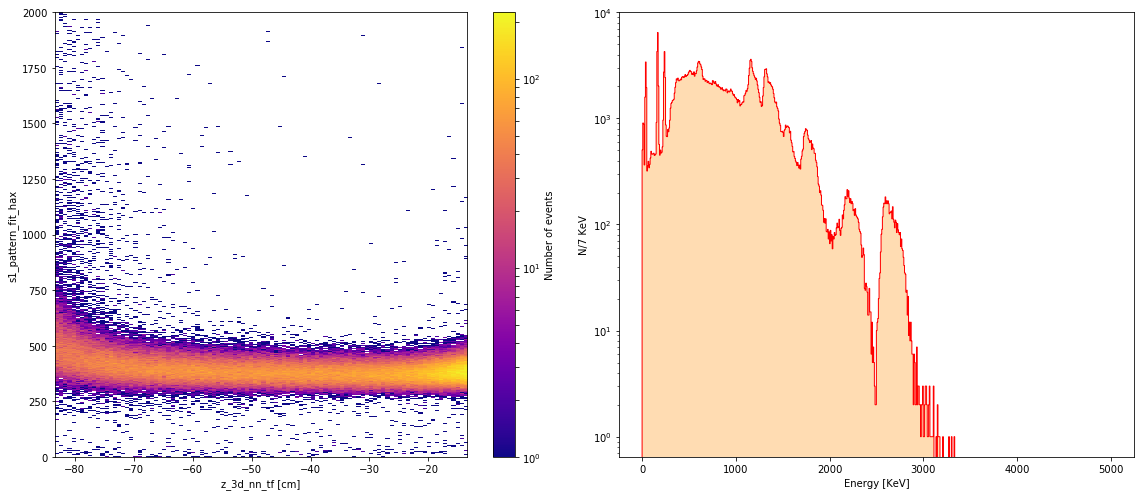

In [6]:
plt.figure(figsize=(16,7))
plt.subplot(121)
hist_z, xbins_z, ybins_z, _ = plt.hist2d(data['z_3d_nn_tf'], 
                                         data['s1_pattern_fit_hax'],
                                         bins=(100,1000), 
                                         range=((-83.45, -13.45), (0.0,2000)), 
                                         cmap=plt.cm.plasma, 
                                         norm=matplotlib.colors.LogNorm(),
                                         cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z_3d_nn_tf [cm]')
plt.ylabel('s1_pattern_fit_hax')

plt.subplot(122)
plt.hist(data['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [KeV]')
plt.ylabel('N/7 KeV')
plt.yscale('log')

plt.tight_layout()
plt.show()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


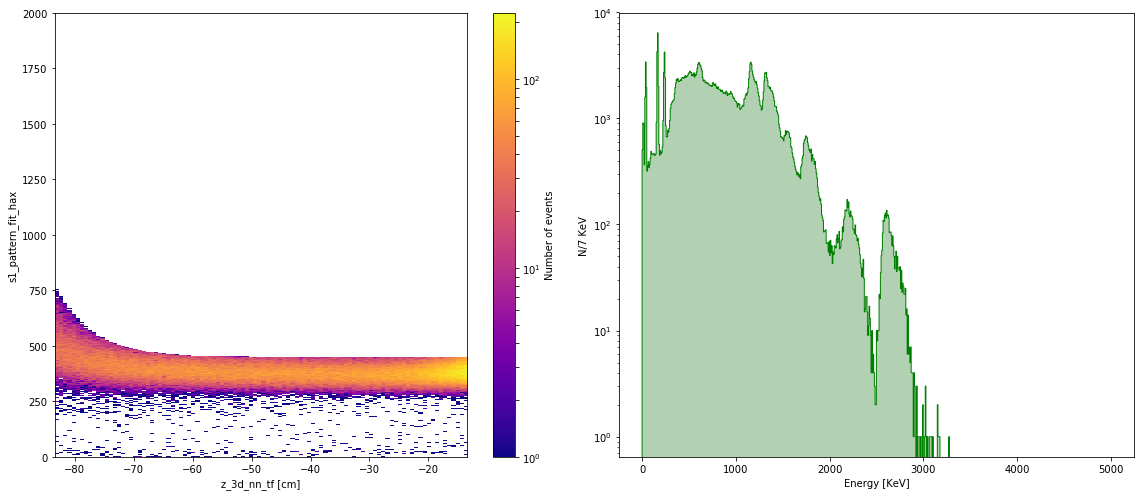

In [7]:
plt.figure(figsize=(16,7))
plt.subplot(121)
hist_z, xbins_z, ybins_z, _ = plt.hist2d(data_AF_z['z_3d_nn_tf'], 
                                         data_AF_z['s1_pattern_fit_hax'],
                                         bins=(100,1000), 
                                         range=((-83.45, -13.45), (0.0,2000)), 
                                         cmap=plt.cm.plasma, 
                                         norm=matplotlib.colors.LogNorm(),
                                         cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z_3d_nn_tf [cm]')
plt.ylabel('s1_pattern_fit_hax')

plt.subplot(122)
plt.hist(data_AF_z['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='bar', color='darkgreen',
         alpha = 0.3)
plt.hist(data_AF_z['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='step', color='green',
         alpha = 1)
plt.xlabel('Energy [KeV]')
plt.ylabel('N/7 KeV')
plt.yscale('log')

plt.tight_layout()
plt.show()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


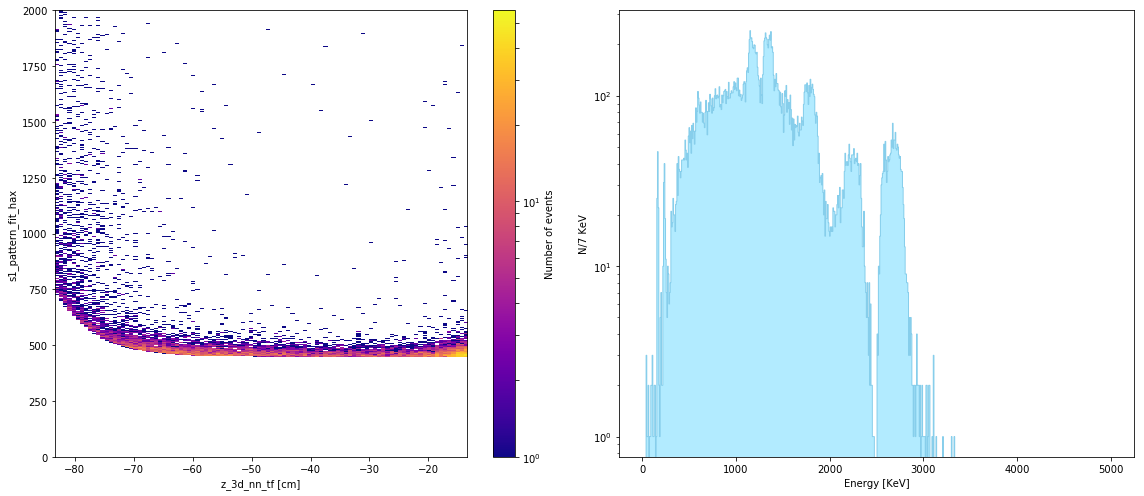

In [8]:
plt.figure(figsize=(16,7))
plt.subplot(121)
hist_z, xbins_z, ybins_z, _ = plt.hist2d(data_cut_z['z_3d_nn_tf'], 
                                         data_cut_z['s1_pattern_fit_hax'],
                                         bins=(100,1000), 
                                         range=((-83.45, -13.45), (0.0,2000)), 
                                         cmap=plt.cm.plasma, 
                                         norm=matplotlib.colors.LogNorm(),
                                         cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('z_3d_nn_tf [cm]')
plt.ylabel('s1_pattern_fit_hax')

plt.subplot(122)
plt.hist(data_cut_z['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='bar', color='deepskyblue',
         alpha = 0.3)
plt.hist(data_cut_z['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='step', color='skyblue',
         alpha = 1)
plt.xlabel('Energy [KeV]')
plt.ylabel('N/7 KeV')
plt.yscale('log')

plt.tight_layout()
plt.show()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:68: RuntimeWarning: invalid value encountered in true_divide
  q_ = count * 1. / nobs
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:111: RuntimeWarning: divide by zero encountered in true_divide
  denom = 1 + crit2 / nobs
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:112: RuntimeWarning: divide by zero encountered in true_divide
  center = (q_ + crit2 / (2 * nobs)) / denom
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/statsmodels/stats/proportion.py:113: RuntimeWarning: divide by zero encountered in true_divide
  dist = crit * np.sqrt(q_ * (1. - q_) / nobs + crit2 / (4. * nobs**2))
/project/lgrandi/anaconda

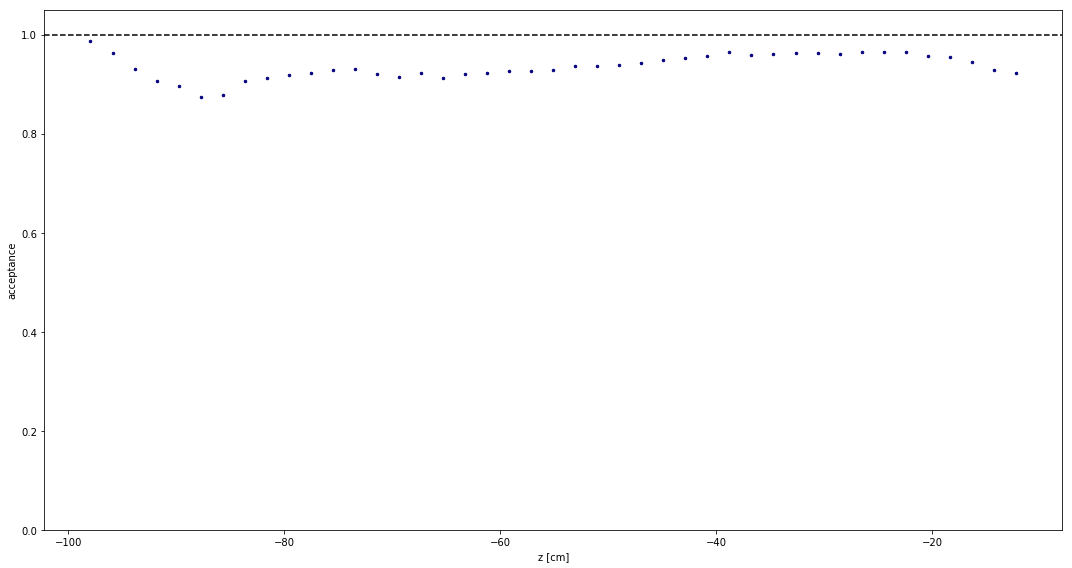

In [9]:
from statsmodels.stats.proportion import proportion_confint
binomial_error_method = 'wilson'
binomial_alpha = 0.68


def acceptance(data_before, data_after):
    after, bins=np.histogram(data_after ,bins=Bins, range=hist_range)
    before, bins=np.histogram(data_before ,bins=Bins, range=hist_range)

    acceptance = after/before
    error = proportion_confint(after, before, method=binomial_error_method, alpha=binomial_alpha)
    err_low = error[0]
    err_high = error[1]
    yerr_low, yerr_high = (acceptance - err_low, err_high - acceptance)
    err = (yerr_low, yerr_high)

    plt.errorbar(binn, acceptance, err,0, marker='.', markersize=5, linestyle="", linewidth=0.5, color='navy')
    plt.axhline(y=1, color='k',linestyle='--')
    plt.ylabel('acceptance')
    plt.ylim(0,1.05)

Bins=50
hist_range=([-100, 0])  
binn=np.linspace(-100,0,Bins)
fig = plt.figure(figsize=(15, 8))
acceptance(data.z_3d_nn_tf, data_AF_z.z_3d_nn_tf)
#plt.axvline(x=36.94, color='r',linestyle='--', label='1T FV radius')
plt.xlabel('z [cm]')
plt.legend(loc='best')
#plt.ylim(0.85,1.05)
plt.tight_layout()
plt.show()

- cut on s1

In [10]:
def S1PatternLikelihoodProfile_old_2(x, a, b, c, d):
    return a + b*pow(x, 0.5) + c*x + d*pow(x, 1.5)
 
def poly3(x, p0, p1, p2, p3):
    return p0 + p1 * x + p2 * x**2 + p3 * x**3
 
popt_1 = [2.15567949e+01, 3.73746867e+01, -1.17754277e+00, 1.29892668e-02]
popt_2 = [4.04890332e+02, 2.94875900e-02, -2.93307586e-06, 8.40845997e-11]  
 
data['CutS1PF'] = (((data['s1_pattern_fit_hax'] < S1PatternLikelihoodProfile_old_2(data['s1'], *popt_1))*(data['s1']<585))
                  +((data['s1_pattern_fit_hax'] < poly3(data['s1'], *popt_2))*(data['s1']>=585)))

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [11]:
data_AF_s1 = hax.cuts.selection(data, data['CutS1PF'] == True)
data_cut_s1 = hax.cuts.selection(data, data['CutS1PF'] == False)

Unnamed selection: 86880 rows removed (80.35% passed)
Unnamed selection: 355159 rows removed (19.65% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


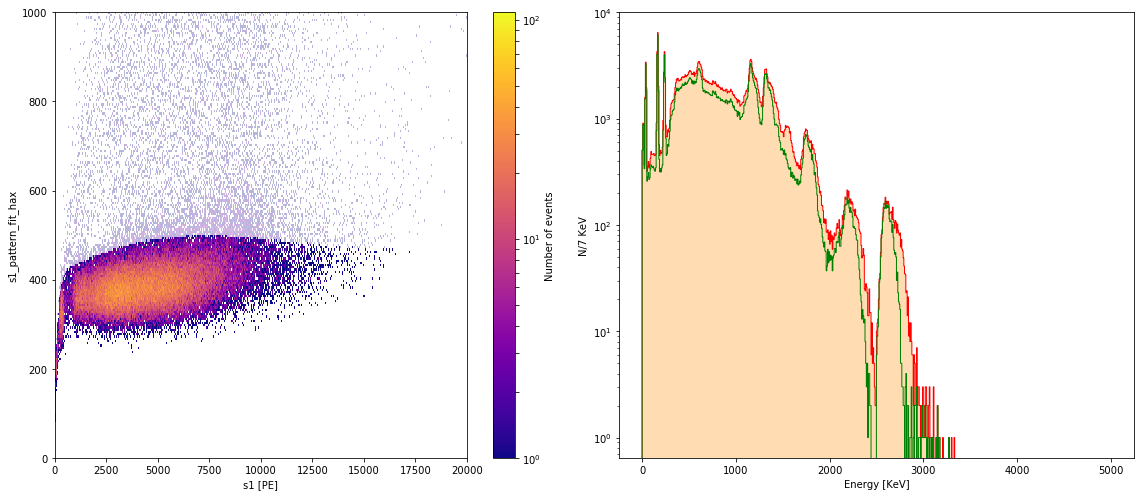

In [12]:
plt.figure(figsize=(16,7))
plt.subplot(121)
hist, xbins, ybins, _ = plt.hist2d(data['s1'], data['s1_pattern_fit_hax'], 
                                   bins = (2000, 200), 
                                   range=((0,2e4), (0,1000)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_AF_s1, xbins_AF_s1, ybins_AF_s1, _ = plt.hist2d(data_AF_s1['s1'], data_AF_s1['s1_pattern_fit_hax'], 
                                                     bins = (2000, 200), 
                                                     range=((0,2e4), (0,1000)), 
                                                     cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                                     cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s1 [PE]')
plt.ylabel('s1_pattern_fit_hax')

plt.subplot(122)
plt.hist(data['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='step', color='red',
         alpha = 1)
plt.hist(data_AF_s1['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='step', color='green',
         alpha = 1)
plt.xlabel('Energy [KeV]')
plt.ylabel('N/7 KeV')
plt.yscale('log')

plt.tight_layout()
plt.show()

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


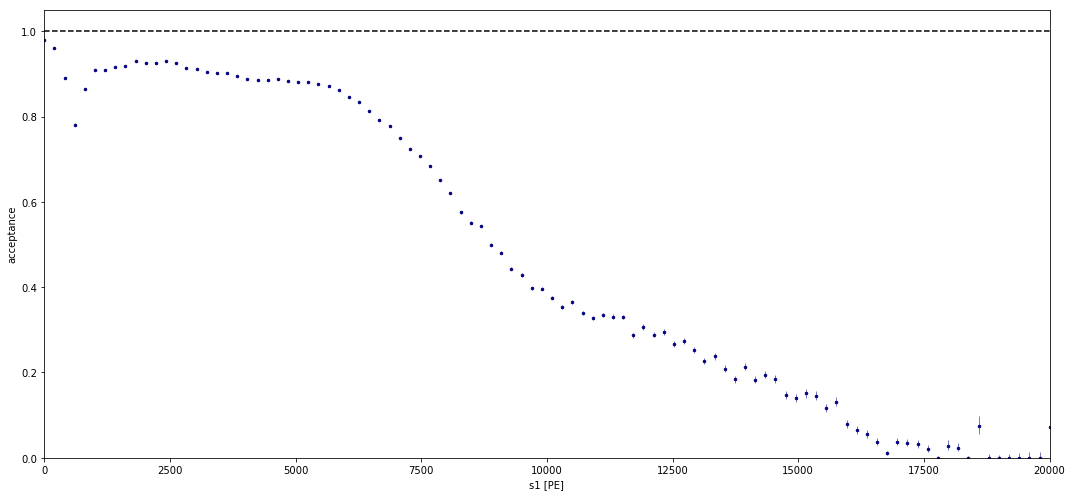

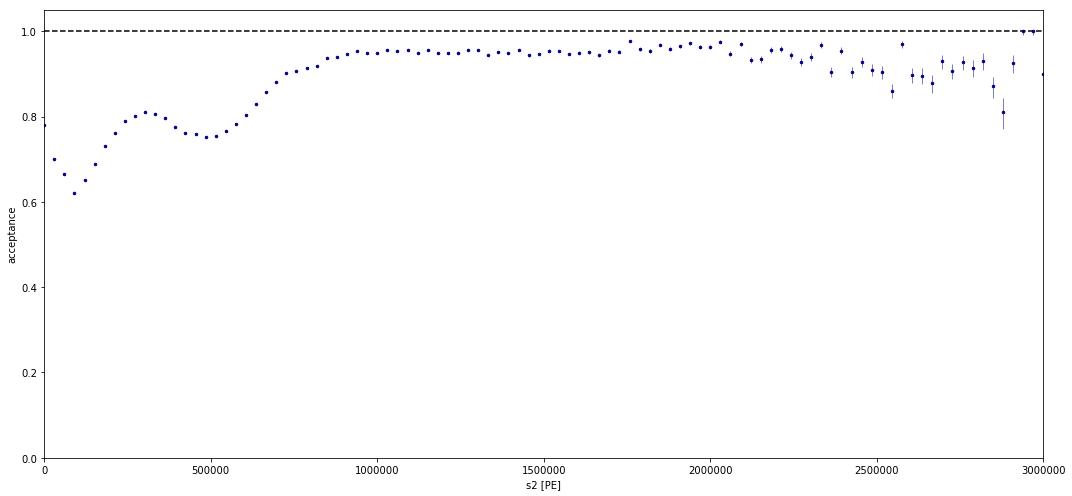

In [ ]:
def acceptance(data_before, data_after):
    after, bins=np.histogram(data_after ,bins=Bins, range=hist_range)
    before, bins=np.histogram(data_before ,bins=Bins, range=hist_range)

    acceptance = after/before
    error = proportion_confint(after, before, method=binomial_error_method, alpha=binomial_alpha)
    err_low = error[0]
    err_high = error[1]
    yerr_low, yerr_high = (acceptance - err_low, err_high - acceptance)
    err = (yerr_low, yerr_high)

    plt.errorbar(binn, acceptance, err,0, marker='.', markersize=5, linestyle="", linewidth=0.5, color='navy')
    plt.axhline(y=1, color='k',linestyle='--')
    plt.ylabel('acceptance')
    plt.ylim(0,1.05)
    return (binn, acceptance)

Bins=100
hist_range=([0,2e4])  
binn=np.linspace(0,2e4,Bins)
fig = plt.figure(figsize=(15, 7))
bin_s1, acc_s1 = acceptance(data['s1'], data_AF_s1['s1'])
acc_s1_mean = acc_s1.mean()
#plt.hlines(y=acc_s1_mean, xmin=0, xmax=2e4, color='r',linestyle='--', label=str(acc_s1_mean)+'%')
plt.xlim(-1, 2e4)
plt.xlabel('s1 [PE]')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Bins=100
hist_range=([0,3e6])  
binn=np.linspace(0,3e6,Bins)
fig = plt.figure(figsize=(15, 7))
bin_s2, acc_s2 = acceptance(data['s2'], data_AF_s1['s2'])
acc_s2_mean = acc_s2.mean()
#plt.hlines(y=acc_s2_mean, xmin=0, xmax=3e6, color='r',linestyle='--', label=str(acc_s2_mean)+'%')
plt.xlim(-1, 3e6)
plt.xlabel('s2 [PE]')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Acceptance study on xyz

In [ ]:
data_AF_2 = data_AF_s1.copy()
data_AF_2['theta_3d_nn_tf'] = 2 * np.pi * np.arctan(data_AF_2['y_3d_nn_tf']/data_AF_2['x_3d_nn_tf'])
tmp = data_AF_2.copy()
z1 = tmp[(tmp['z_3d_nn_tf']>-30) & (tmp['z_3d_nn_tf']<=-10)]
z2 = tmp[(tmp['z_3d_nn_tf']>-70) & (tmp['z_3d_nn_tf']<=-30)]
z3 = tmp[(tmp['z_3d_nn_tf']>-90) & (tmp['z_3d_nn_tf']<=-70)]
tmp = data.copy()
z1_white = tmp[(tmp['z_3d_nn_tf']>-30) & (tmp['z_3d_nn_tf']<=-10)]
z2_white = tmp[(tmp['z_3d_nn_tf']>-70) & (tmp['z_3d_nn_tf']<=-30)]
z3_white = tmp[(tmp['z_3d_nn_tf']>-90) & (tmp['z_3d_nn_tf']<=-70)]
del tmp

In [ ]:
plt.figure(figsize=(8,6))
hist_data_1, x_data_1, y_data_1 = np.histogram2d(z1_white['x_3d_nn_tf'], z1_white['y_3d_nn_tf'], 
                                                 bins=(100,100), range=((-45, +45), (-45, +45)))
hist_cut_1, x_cut_1, y_cut_1 = np.histogram2d(z1['x_3d_nn_tf'], z1['y_3d_nn_tf'], 
                                              bins=(100,100), range=((-45, +45), (-45, +45)))
Acceptance_xy_1 = hist_cut_1/hist_data_1
c_1 = plt.pcolor(x_data_1, y_data_1, Acceptance_xy_1, cmap='RdBu', vmin=0, vmax=1)
plt.colorbar(c_1, label='Acceptance')
plt.title('z=[-30,-10] cm')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
hist_data_2, x_data_2, y_data_2 = np.histogram2d(z2_white['x_3d_nn_tf'], z2_white['y_3d_nn_tf'], 
                                                 bins=(100,100), range=((-45, +45), (-45, +45)))
hist_cut_2, x_cut_2, y_cut_2 = np.histogram2d(z2['x_3d_nn_tf'], z2['y_3d_nn_tf'], 
                                              bins=(100,100), range=((-45, +45), (-45, +45)))
Acceptance_xy_2 = hist_cut_2/hist_data_2
c_2 = plt.pcolor(x_data_2, y_data_2, Acceptance_xy_2, cmap='RdBu', vmin=0, vmax=1)
plt.colorbar(c_2, label='Acceptance')
plt.title('z=[-70,-30] cm')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
hist_data_3, x_data_3, y_data_3 = np.histogram2d(z3_white['x_3d_nn_tf'], z3_white['y_3d_nn_tf'], 
                                                 bins=(100,100), range=((-45, +45), (-45, +45)))
hist_cut_3, x_cut_3, y_cut_3 = np.histogram2d(z3['x_3d_nn_tf'], z3['y_3d_nn_tf'], 
                                              bins=(100,100), range=((-45, +45), (-45, +45)))
Acceptance_xy_3 = hist_cut_3/hist_data_3
c_3 = plt.pcolor(x_data_3, y_data_3, Acceptance_xy_3, cmap='RdBu', vmin=0, vmax=1)
plt.colorbar(c_3, label='Acceptance')
plt.title('z=[-90,-70] cm')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(121)
hist, xbins, ybins, _ = plt.hist2d(z1_white['s1'], z1_white['s1_pattern_fit_hax'], 
                                   bins = (2000, 200), 
                                   range=((0,2e4), (0,1000)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_AF_s1, xbins_AF_s1, ybins_AF_s1, _ = plt.hist2d(z1['s1'], z1['s1_pattern_fit_hax'], 
                                                     bins = (2000, 200), 
                                                     range=((0,2e4), (0,1000)), 
                                                     cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                                     cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s1 [PE]')
plt.ylabel('s1_pattern_fit_hax')

plt.subplot(122)
plt.hist(z1_white['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(z1_white['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='step', color='red',
         alpha = 1)
plt.hist(z1['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='step', color='green',
         alpha = 1)
plt.xlabel('Energy [KeV]')
plt.ylabel('N/7 KeV')
plt.yscale('log')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(121)
hist, xbins, ybins, _ = plt.hist2d(z2_white['s1'], z2_white['s1_pattern_fit_hax'], 
                                   bins = (2000, 200), 
                                   range=((0,2e4), (0,1000)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_AF_s1, xbins_AF_s1, ybins_AF_s1, _ = plt.hist2d(z2['s1'], z2['s1_pattern_fit_hax'], 
                                                     bins = (2000, 200), 
                                                     range=((0,2e4), (0,1000)), 
                                                     cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                                     cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s1 [PE]')
plt.ylabel('s1_pattern_fit_hax')

plt.subplot(122)
plt.hist(z2_white['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(z2_white['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='step', color='red',
         alpha = 1)
plt.hist(z2['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='step', color='green',
         alpha = 1)
plt.xlabel('Energy [KeV]')
plt.ylabel('N/7 KeV')
plt.yscale('log')

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(121)
hist, xbins, ybins, _ = plt.hist2d(z3_white['s1'], z3_white['s1_pattern_fit_hax'], 
                                   bins = (2000, 200), 
                                   range=((0,2e4), (0,1000)), 
                                   cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                   cmin = 1,alpha = 0.3)
hist_AF_s1, xbins_AF_s1, ybins_AF_s1, _ = plt.hist2d(z3['s1'], z3['s1_pattern_fit_hax'], 
                                                     bins = (2000, 200), 
                                                     range=((0,2e4), (0,1000)), 
                                                     cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
                                                     cmin = 1,alpha = 1)
plt.colorbar(label='Number of events')
plt.xlabel('s1 [PE]')
plt.ylabel('s1_pattern_fit_hax')

plt.subplot(122)
plt.hist(z3_white['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(z3_white['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='step', color='red',
         alpha = 1)
plt.hist(z3['CES']/10**3, bins = (700), 
         range=(0, 5000), 
         histtype='step', color='green',
         alpha = 1)
plt.xlabel('Energy [KeV]')
plt.ylabel('N/7 KeV')
plt.yscale('log')

plt.tight_layout()
plt.show()

- Run for waveform plotting

In [ ]:
z3_cut = data_cut_s1[(data_cut_s1['z_3d_nn_tf']>-90) & (data_cut_s1['z_3d_nn_tf']<=-70)]
z3_cut['event_time_date'] = pd.to_datetime(z3_cut.event_time)

In [ ]:
z3_cut[['run_number', 'event_number', 'event_time_date']]

In [ ]:
z3_cut.to_pickle('/home/gvolta/Desktop/SR1/S1PatternLikelihoodExtended/data/z3_cut.pkl')
z3.to_pickle('/home/gvolta/Desktop/SR1/S1PatternLikelihoodExtended/data/z3.pkl')